# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import pandas as pd

# TODO: Fill this in based on where you saved the training and testing data

training_file = "/Users/Razvan/Documents/SDC/CarND-Traffic-Sign-Classifier-Project/data/train.p"
testing_file = "/Users/Razvan/Documents/SDC/CarND-Traffic-Sign-Classifier-Project/data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
sign_names = pd.read_csv('signnames.csv')

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

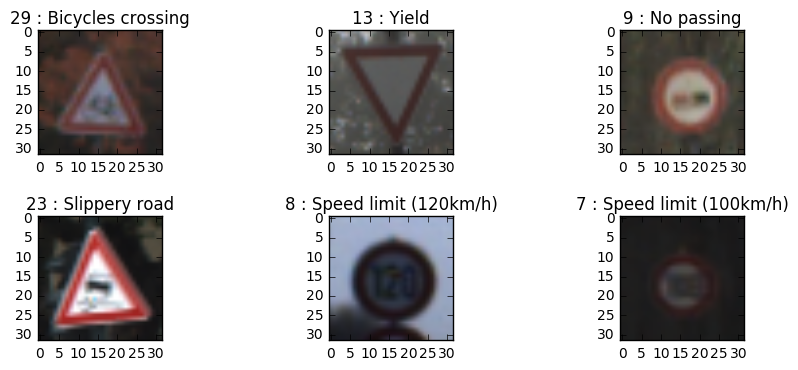

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 1)
Number of classes = 43


In [2]:
### Replace each question mark with the appropriate value.
import numpy as np 
import matplotlib.pyplot as plt
import cv2

#print(len(X_train))
#print(len(y_train))
#print(len(X_test))
#print(len(y_test))

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

def normalize_grayscale(image_data):
    a = 0.0
    b = 1.0
    grayscale_min = 0
    grayscale_max = 255
    return a + (((image_data - grayscale_min)*(b - a))/( grayscale_max - grayscale_min))

def to_gray(img_array):
    new_array = []
    for i in range(len(img_array)):
        new_array.append(cv2.cvtColor(img_array[i], cv2.COLOR_RGB2GRAY))
    new_array = np.array(new_array).reshape((-1,32,32,1))
    #new_array = normalize_grayscale(new_array)
    return new_array

sign_labels = np.genfromtxt('signnames.csv', delimiter=',',skip_header=1, usecols=(1,), unpack=True, dtype=None)

def plot_images(images, rows, columns, labels=[], labels_dict={}, random=True):
    figure = plt.figure()
    figure.subplots_adjust(right=1.5, hspace=0.5)
    n_images = len(images)
    max_plots = rows * columns
    end_range = n_images + 1 if n_images < max_plots else max_plots + 1
    for i in range(1,end_range):
        idx = np.random.choice(n_images, size=1, replace=False)[0] if random == True else i-1
        image = images[idx]
        subplot = figure.add_subplot(rows,columns,i)
        if len(labels) == n_images:
            id = labels[idx] 
            #label = labels_dict[id].decode()      
            label = "{0} : {1}".format(id, labels_dict[id].decode())
        else:
            label = ""
        subplot.set_title(label)
        plt.imshow(image)
    plt.show()
    

plot_images(X_train, 2, 3, y_train, sign_labels)

X_train = to_gray(X_train)
X_test = to_gray(X_test)


# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.bincount(y_test).nonzero()[0].size

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Label: 8 - Speed limit (120km/h)


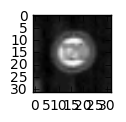

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray") 
label = "Label: {0} - {1}".format(y_train[index], sign_labels[y_train[index]].decode())
print(label)

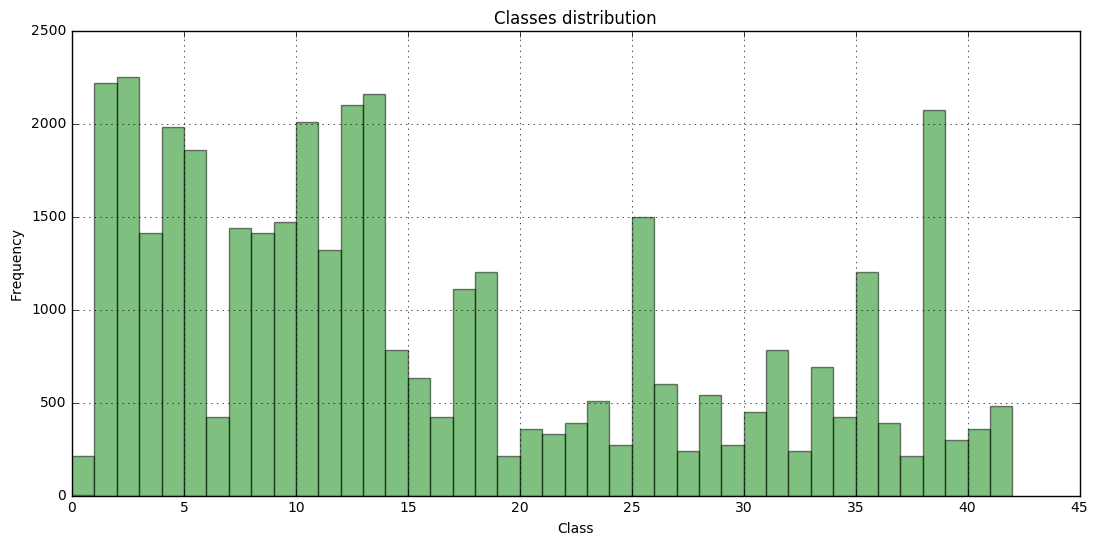

In [4]:
# Display the classes distribution
def display_class_hist(labels, labels_count):
    plt.figure(figsize=(13, 6))
    plt.xlabel("Class")
    plt.ylabel("Frequency")
    plt.title("Classes distribution")
    plt.hist(labels, labels_count-1, facecolor='green', alpha=0.5)
    plt.grid(True)
    plt.show()

display_class_hist(y_train, n_classes)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
#X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
#X_train, y_train = shuffle(X_train, y_train)

import tensorflow as tf

EPOCHS = 15
BATCH_SIZE = 256

#keep_prob = tf.placeholder(tf.float32)

In [6]:
# LeNet architecture
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.softmax(conv1) # softmax
    conv1 = tf.nn.relu(conv1)
    #conv1 = tf.nn.dropout(conv1, keep_prob) # dropout

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.softmax(conv2) # softmax
    conv2 = tf.nn.relu(conv2)
    #conv2 = tf.nn.dropout(conv2, keep_prob) # dropout

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits, conv1_W, conv1_b, conv2_W, conv2_b, fc1_W, fc1_b, fc2_W, fc2_b, fc3_W, fc3_b

In [7]:
# features and labels
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

# training pipeline
rate = 0.001

#logits = LeNet(x)
logits, conv1_W, conv1_b, conv2_W, conv2_b, fc1_W, fc1_b, fc2_W, fc2_b, fc3_W, fc3_b = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [10]:
# model evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
#saver = tf.train.Saver()

saver = tf.train.Saver([conv1_W, conv1_b, conv2_W, conv2_b, fc1_W, fc1_b, fc2_W, fc2_b, fc3_W, fc3_b])

# Save placeholders & operations
tf.add_to_collection('x', x)
tf.add_to_collection('y', y)
#tf.add_to_collection('keep_prob', keep_prob)
tf.add_to_collection('logits', logits)
tf.add_to_collection('correct_prediction', correct_prediction)
tf.add_to_collection('accuracy_operation', accuracy_operation)

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


# Keep track of how long the optimization takes
import time

# train the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    start = time.time()

    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        c = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y}) 
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ".format(i+1), "cost: ", "{:.9f}".format(c), " accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    
    end = time.time()
    hours, rem = divmod(end - start, 3600)
    minutes, seconds = divmod(rem, 60)

    # Display amount of time for training
    print("\n")
    print("Optimization finished in:")
    print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))
    print("\n")

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
    # Save the resulting model.
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'lenet22')
    print("Model saved")

Training...

EPOCH 1  cost:  1.684954643  accuracy = 0.534

EPOCH 2  cost:  0.443398386  accuracy = 0.840

EPOCH 3  cost:  0.341436177  accuracy = 0.917

EPOCH 4  cost:  0.190849394  accuracy = 0.943

EPOCH 5  cost:  0.116763234  accuracy = 0.954

EPOCH 6  cost:  0.158863366  accuracy = 0.950

EPOCH 7  cost:  0.061382923  accuracy = 0.960

EPOCH 8  cost:  0.031466082  accuracy = 0.964

EPOCH 9  cost:  0.049843952  accuracy = 0.961

EPOCH 10  cost:  0.039744586  accuracy = 0.970

EPOCH 11  cost:  0.034117389  accuracy = 0.970

EPOCH 12  cost:  0.039611179  accuracy = 0.973

EPOCH 13  cost:  0.023380378  accuracy = 0.975

EPOCH 14  cost:  0.022031290  accuracy = 0.974

EPOCH 15  cost:  0.050591473  accuracy = 0.976



Optimization finished in:
00:04:50.90


Test Accuracy = 0.925
Model saved


In [11]:
#evaluate the model

with tf.Session() as sess:
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, '/Users/Razvan/Documents/SDC/CarND-Traffic-Sign-Classifier-Project/lenet22')

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.925


In [ ]:
# OLD image reading
import matplotlib.image as mpimg
import os

folder_name = "/Users/Razvan/Documents/SDC/GTSRB/new data/"
filenames = ["1.png", "2.png", "3.png", "4.png", "5.png", "6.png", "7.png", "8.png", "9.png"]

test_images = [mpimg.imread(folder_name + "/" + file) for file in filenames]
test_images = [cv2.resize(image, (32, 32)) for image in test_images]
new_labels = np.array([35., 0., 30., 40., 1., 10., 10., 40., 9.], np.float)

#test_images = to_gray(np.array(test_images))

plot_images(test_images, rows=3, columns=3, labels=new_labels, labels_dict=sign_labels, random=False)

In [12]:
# grayscale convert loaded images

import matplotlib.image as mpimg
import cv2
  
def grayscale(image):
  converted = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  return np.expand_dims(converted, axis=4)

def process_images(images):
  # Convert from rgb to grayscale 
  processed = [grayscale(image) for image in images]
  # Convert from rgb to yuv 
  #processed = [rgb_to_yuv(image) for image in images]

  # Scale the image
  #processed = [normalize(image) for image in processed]

  # Return processed images list as a numpy array
  return np.asarray(processed)

def one_hot(y, n_classes):
  y_one_hot = tf.one_hot(y, n_classes, dtype=np.float32)
  return y_one_hot.eval()

In [13]:
# try different data loading for almost working version:
import cv2
import os
import numpy as np

def load_and_scale_images2(folder):
    """Load and scale the new images to be 32x32x3"""
    image_names = os.listdir(folder)
    #image_names.remove('.DS_Store')
    bgr_images = [cv2.imread(folder + "/" + name) for name in image_names]
    rgb_images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in bgr_images]
    resized_images = [cv2.resize(img, (32, 32)) for img in rgb_images] 

    return resized_images

# Load the new scaled images
images2 = load_and_scale_images2("ddata")


# Number of images
#n_img = images.shape[0]

new_images_normalized = process_images(images2)
#print(images2.shape)
print(new_images_normalized.shape)

new_labels = np.array([35., 0., 30., 40., 1., 10., 10., 40., 9.], np.float)

(9, 32, 32, 1)


In [24]:
# doesn't work...
import tensorflow as tf

tf.reset_default_graph()

with tf.Session() as sess:
    save_file = '/Users/Razvan/Documents/SDC/CarND-Traffic-Sign-Classifier-Project/lenet22'
    saver = tf.train.import_meta_graph(save_file + '.meta')
    saver.restore(sess, save_file)
    print('Model restored with latest weights')
    
    # Restore the placeholder
    x = tf.get_collection('x')[0]
    y = tf.get_collection('y')[0]
    #keep_prob  = tf.get_collection('keep_prob')[0]
    print("Placeholder restored")
    
    # Restore the operations
    logits = tf.get_collection('logits')[0] 
    
    # model evaluation
    prediction = tf.argmax(logits, 1)

    test_prediction = sess.run(
        prediction,
        feed_dict={x: new_images_normalized})
for i in range(len(images2)):
    print('Prediction: {} \t| {}'.format(test_prediction[i], label_names_dict[test_prediction[i]]))

Model restored with latest weights
Placeholder restored
Prediction: 35 	| Ahead only
Prediction: 0 	| Speed limit (20km/h)
Prediction: 30 	| Beware of ice/snow
Prediction: 40 	| Roundabout mandatory
Prediction: 1 	| Speed limit (30km/h)
Prediction: 42 	| End of no passing by vehicles over 3.5 metric tons
Prediction: 42 	| End of no passing by vehicles over 3.5 metric tons
Prediction: 40 	| Roundabout mandatory
Prediction: 9 	| No passing


In [19]:
# almost working
#
#
#
import tensorflow as tf

tf.reset_default_graph()

with tf.Session() as sess:
    save_file = '/Users/Razvan/Documents/SDC/CarND-Traffic-Sign-Classifier-Project/lenet22'
    saver = tf.train.import_meta_graph(save_file + '.meta')
    saver.restore(sess, save_file)
    print('Model restored with latest weights')

    # Restore the placeholder
    x = tf.get_collection('x')[0]
    y = tf.get_collection('y')[0]
    print("Placeholder restored")

    # Restore the operations
    logits = tf.get_collection('logits')[0] 
    accuracy_operation = tf.get_collection('accuracy_operation')[0]
    print("Operations restored")
    
    probabilities = tf.placeholder(tf.float32, (None, 43))
    #keep_prob = tf.placeholder(tf.float32)

    all_vars = tf.trainable_variables()
    print("Restored {0} variables".format(len(all_vars)))
    
    # Run the model
    #new_images_normalized = process_images(test_images)
    predictions = sess.run(logits, feed_dict={x: new_images_normalized})
    labels = np.argmax(predictions, axis=1)

    accuracy = sess.run(accuracy_operation, feed_dict={x: new_images_normalized, y: new_labels})
    print()
    print("Accuracy on the new images = {:.3f}".format(accuracy))
    
    
    top_k_probs = sess.run(tf.nn.top_k(tf.nn.softmax(probabilities), k=5, sorted=True), feed_dict={probabilities: predictions})
    print("top_k probabilities stored in 'top_k_probs' variable.")

top_k_probabilities = top_k_probs[0]
top_k_predictions = top_k_probs[1]

print()
print("Displaying the first 5 entries...")
print(top_k_probabilities[:5])
print()
print(top_k_predictions[:5])

Model restored with latest weights
Placeholder restored
Operations restored
Restored 10 variables

Accuracy on the new images = 0.778
top_k probabilities stored in 'top_k_probs' variable.

Displaying the first 5 entries...
[[  9.99979973e-01   1.12110565e-05   3.89099660e-06   1.96694032e-06
    1.87084504e-06]
 [  9.99733388e-01   1.19584984e-04   1.00413250e-04   2.76601368e-05
    1.88248541e-05]
 [  9.08429682e-01   9.08844247e-02   6.28872542e-04   3.72857139e-05
    9.89783803e-06]
 [  7.76267529e-01   2.19083086e-01   4.56725108e-03   4.77432441e-05
    9.80176719e-06]
 [  9.88806725e-01   7.94420857e-03   1.76946295e-03   7.64021650e-04
    4.91061830e-04]]

[[35 36 33 12 34]
 [ 0  1  4  8  5]
 [30 11 29 28 21]
 [40 12  8 33 14]
 [ 1  4  2  7  5]]


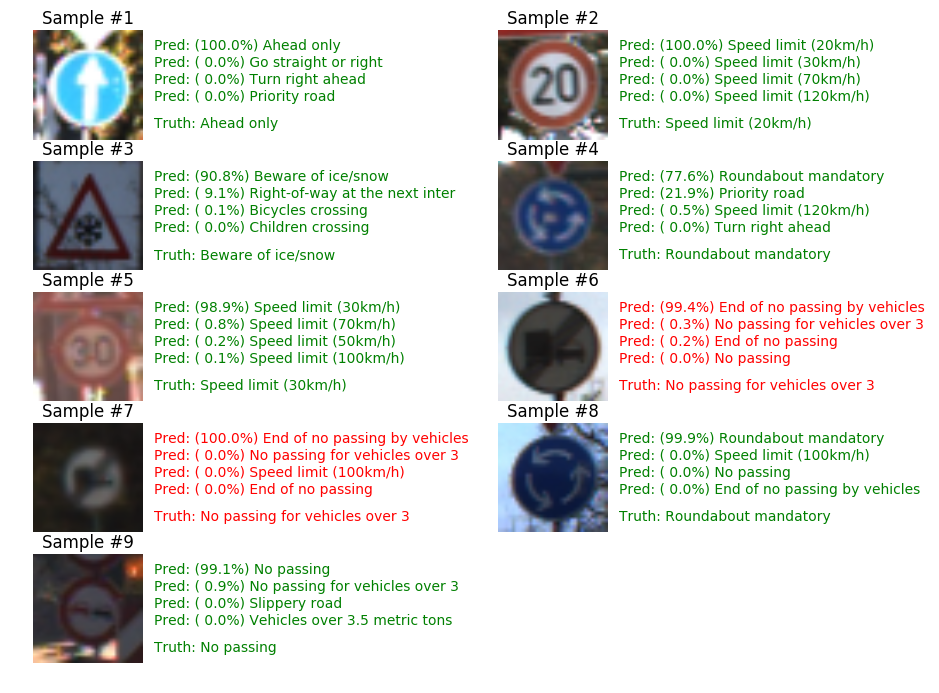

In [20]:
# Display the predictions and the ground truth visually.
import csv 

def load_label_names(filename):
    """Read the .csv file with the label names.
    
    returns:
        A dict with (key:val) mapped to (id:name)
    """
    d = {}
    with open(filename) as f:
        csv_reader = csv.reader(f)
        pairs = [(int(r[0]),r[1]) for r in csv_reader if r[0]!='ClassId']
        d = dict(pairs)

    return d

label_names_dict = load_label_names('signnames.csv')

fig = plt.figure(figsize=(11, 20))
for i in range(len(predictions)):
    truth = new_labels[i]
    prediction = labels[i]
    plt.subplot(12, 2, 1+i)
    plt.title("Sample #{0}".format(i+1))
    plt.axis('off')
    color = 'green' if truth == prediction else 'red'

    # Plot the top 4 probabilities on the side of the image
    for j in range(4):
        pred_label = label_names_dict[top_k_predictions[i][j]]
        pred_certainty = top_k_probabilities[i][j]
        plt.text(35, 5*(j+1), "Pred: ({0:4.1f}%) {1:.30}".format(100*pred_certainty, pred_label), color=color)

    # Plot the truth label or 'Not in Training Set' if not present.
    if truth != -1:
        plt.text(35, 28, "Truth: {0:.30}".format(label_names_dict[truth]), color=color)
    else:
        plt.text(35, 28, "Truth: {0}".format('Not in Training Set'), color=color)

#    plt.imshow(test_images[i])
    plt.imshow(images2[i])

Loaded 43 label names.



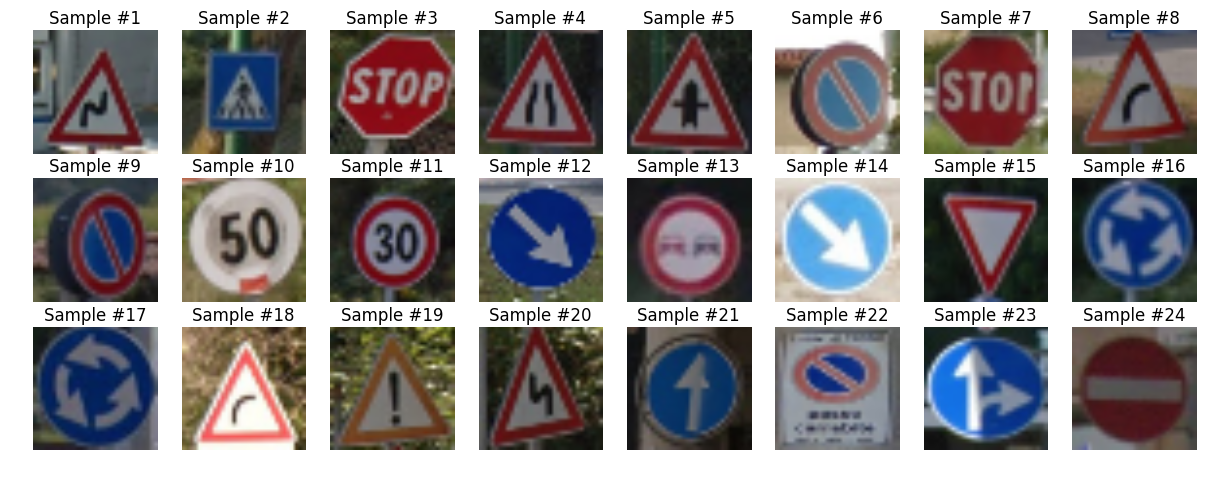

In [25]:
def load_and_scale_images(folder):
    """Load and scale the new images to be 32x32x3"""
    image_names = os.listdir(folder)
    image_names.remove('.DS_Store')
    bgr_images = [cv2.imread(folder + "/" + name) for name in image_names]
    rgb_images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in bgr_images]
    resized_images = [cv2.resize(img, (32, 32)) for img in rgb_images]
    
    grayscale_images = [cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in rgb_images]
    
    #new_array = []
    #for img in rgb_images:
    #    new_array.append(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))
    #new_array = np.array(new_array).reshape((-1,32,32,1))
    
    #new_array = []
    #for i in range(len(rgb_images)):
    #    new_array.append(cv2.cvtColor(rgb_images[i], cv2.COLOR_RGB2GRAY))
    #new_array = np.array(new_array).reshape((-1,32,32,1)) 
    #return new_array
    
    #test_images = [mpimg.imread(folder_name + "/" + file) for file in filenames]
    #test_images = [cv2.resize(image, (32, 32)) for image in test_images]

    return resized_images
    #return np.array(grayscale_images)

def grayscale(image):
  converted = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  return np.expand_dims(converted, axis=4)

def process_images(images):
  # Convert from rgb to grayscale 
  processed = [grayscale(image) for image in images]
  # Convert from rgb to yuv 
  #processed = [rgb_to_yuv(image) for image in images]

  # Scale the image
  #processed = [normalize(image) for image in processed]

  # Return processed images list as a numpy array
  return np.asarray(processed)

def display_new_images(images):
    plt.figure(figsize=(15, 15))
    i = 1
    for image in images:
        plt.subplot(8, 8, i)
        plt.axis('off')
        plt.title("Sample #{0}".format(i))
        plt.imshow(image)
        i += 1

    plt.show()
    return

# Load the label names
label_names_dict = load_label_names('signnames.csv')

# Load the new scaled images
images = load_and_scale_images("newdata")

# Assign the labels, -1 means not in training set.
images_labels = np.array([21, -1, 14, 24, 11, -1, 14, 20,
                          -1, 2, 1, 38, 9, 38, 13, 40,
                          40, 20, 18, 21, 35, -1, 36, 17])

# Number of images
#n_img = images.shape[0]

n_images = process_images(images)

# Image Shape
#img_shape = images.shape[1:]

print("Loaded {0} label names.".format(len(label_names_dict)))
#print("Loaded {0} images of size {1}.".format(n_img, img_shape))
print()

display_new_images(images)

In [26]:
tf.reset_default_graph()

with tf.Session() as sess:
    # Restore the model
    saver = tf.train.import_meta_graph("lenet22" + '.meta') 
    saver.restore(sess, '/Users/Razvan/Documents/SDC/CarND-Traffic-Sign-Classifier-Project/lenet22')
    print("Model restored")

    # Restore the placeholder
    x = tf.get_collection('x')[0]
    y = tf.get_collection('y')[0]
    print("Placeholder restored")

    # Restore the operations
    logits = tf.get_collection('logits')[0]
    accuracy_operation = tf.get_collection('accuracy_operation')[0]
    print("Operations restored")

    all_vars = tf.trainable_variables()
    print("Restored {0} variables".format(len(all_vars)))

    #probabilities = tf.placeholder(tf.float32, (None, 43))
    #keep_prob = tf.placeholder(tf.float32)

    # Run the model
    predictions = sess.run(logits, feed_dict={x: n_images})
    labels = np.argmax(predictions, axis=1)

    accuracy = sess.run(accuracy_operation, feed_dict={x: n_images, y: images_labels})
    print()
    print("Accuracy on the new images = {:.3f}".format(accuracy))

Model restored
Placeholder restored
Operations restored
Restored 10 variables

Accuracy on the new images = 0.542


top_k probabilities stored in 'top_k_probs' variable.

Displaying the first 5 entries...
[[  7.70451069e-01   2.27433860e-01   9.32761061e-04   8.24711111e-04
    2.53840000e-04]
 [  3.11352551e-01   3.04347098e-01   2.35243842e-01   9.84473377e-02
    1.78212430e-02]
 [  4.84314054e-01   3.96386594e-01   8.35354477e-02   1.99679658e-02
    6.16402738e-03]
 [  8.82511616e-01   4.55633476e-02   3.36556062e-02   1.28518119e-02
    1.13110878e-02]
 [  9.98569727e-01   1.39558211e-03   1.83989996e-05   6.82647078e-06
    3.11174995e-06]]

[[28 20 29  3 11]
 [25 20 36 26 38]
 [14  0  3 29  5]
 [28  3  0 25  5]
 [11 27 28 24 29]]


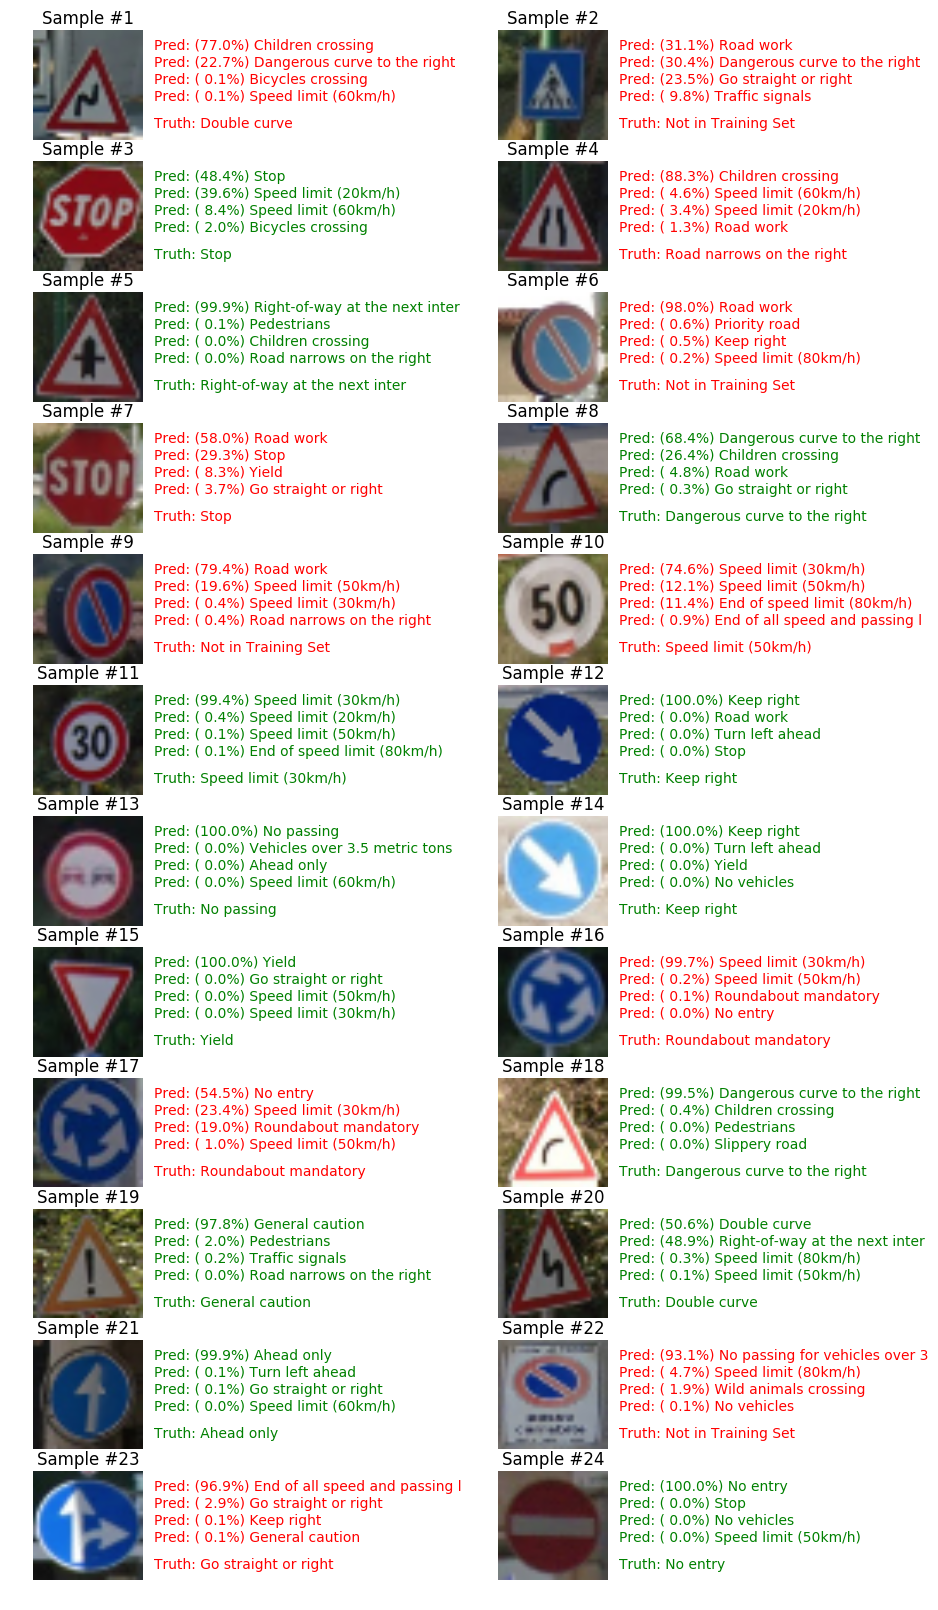

In [27]:
probabilities = tf.placeholder(tf.float32, (None, 43))

with tf.Session() as sess:
    top_k_probs = sess.run(tf.nn.top_k(tf.nn.softmax(probabilities), k=5), feed_dict={probabilities: predictions})
    print("top_k probabilities stored in 'top_k_probs' variable.")

top_k_probabilities = top_k_probs[0]
top_k_predictions = top_k_probs[1]

print()
print("Displaying the first 5 entries...")
print(top_k_probabilities[:5])
print()
print(top_k_predictions[:5])


fig = plt.figure(figsize=(11, 20))
for i in range(len(predictions)):
    truth = images_labels[i]
    prediction = labels[i]
    plt.subplot(12, 2, 1+i)
    plt.title("Sample #{0}".format(i+1))
    plt.axis('off')
    color = 'green' if truth == prediction else 'red'

    # Plot the top 4 probabilities on the side of the image
    for j in range(4):
        pred_label = label_names_dict[top_k_predictions[i][j]]
        pred_certainty = top_k_probabilities[i][j]
        plt.text(35, 5*(j+1), "Pred: ({0:4.1f}%) {1:.30}".format(100*pred_certainty, pred_label), color=color)

    # Plot the truth label or 'Not in Training Set' if not present.
    if truth != -1:
        plt.text(35, 28, "Truth: {0:.30}".format(label_names_dict[truth]), color=color)
    else:
        plt.text(35, 28, "Truth: {0}".format('Not in Training Set'), color=color)

    plt.imshow(images[i])

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

In [ ]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [ ]:
### Train your model here.
### Feel free to use as many code cells as needed.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.